In [18]:
#!pip install us

# Dependencies
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states


# Census API Key
from config import api_key

# 2016

In [19]:
c = Census(api_key, year=2016)

In [20]:
census_2016_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E","B17001_002E", "B25077_001E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_2016_df = pd.DataFrame(census_2016_data)

# Column Reordering
census_2016_df = census_2016_df.rename(columns={"B01003_001E": "Population",
                                                "B17001_002E": "Poverty Count",
                                                "B25077_001E": "Median Home Value",
                                                "NAME": "Name", 
                                                "zip code tabulation area": "Zipcode"})
census_2016_df.head()

,Name,B19013_001E,Population,B01002_001E,B19301_001E,Poverty Count,Median Home Value,Zipcode
0,ZCTA5 05762,58558.0,513.0,39.2,24235.0,50.0,210000.0,05762
1,ZCTA5 05763,54968.0,2715.0,43.9,29674.0,488.0,185900.0,05763
2,ZCTA5 05764,44468.0,3370.0,41.3,22651.0,323.0,168400.0,05764
3,ZCTA5 05765,56771.0,1632.0,46.7,30786.0,85.0,150300.0,05765
4,ZCTA5 05766,52250.0,598.0,45.9,33227.0,76.0,215600.0,05766


In [21]:
# Add in Poverty Rate (Poverty Count / Population)
census_2016_df["Poverty Rate"] = 100 * \
    census_2016_df["Poverty Count"].astype(
        int) / census_2016_df["Population"].astype(int)

# Final DataFrame
census_2016_df = census_2016_df[["Zipcode", "Population", "Poverty Count", "Poverty Rate", "Median Home Value"]]

# Visualize
print(len(census_2016_df))
census_2016_df.head()

33120


,Zipcode,Population,Poverty Count,Poverty Rate,Median Home Value
0,05762,513.0,50.0,9.746589,210000.0
1,05763,2715.0,488.0,17.974217,185900.0
2,05764,3370.0,323.0,9.584570,168400.0
3,05765,1632.0,85.0,5.208333,150300.0
4,05766,598.0,76.0,12.709030,215600.0


In [37]:
#Maria zip codes: 00653 (PR Guanica), 00656 (PR Guayanilla), 00962 (PR Cataño)
#Irma zip codes: 33042(FL Cudjoe Key), 34112 (FL Naples), 34145 (FL Marco Island)
#Harvey zip codes:  77382 (TX Rockport), 77642 (TX Port Arthur), 77701 (TX Beaumont)

zip_code_2016_list = ["00653", "00656", "00962", "33042", "34112", "34145", "77382", "77642", "77701"]

In [38]:
zip_code_2016_df = census_2016_df[census_2016_df["Zipcode"].isin(zip_code_2016_list)]
zip_code_2016_df

,Zipcode,Population,Poverty Count,Poverty Rate,Median Home Value
263,00653,12125.0,7877.0,64.964948,90400.0
264,00656,19996.0,11725.0,58.636727,82700.0
362,00962,20509.0,11245.0,54.829587,112000.0
4108,33042,6707.0,465.0,6.933055,424800.0
5215,34112,25700.0,2792.0,10.863813,169700.0
5230,34145,17361.0,1329.0,7.655089,492000.0
21880,77382,38138.0,1195.0,3.133358,377400.0
22766,77642,39252.0,11279.0,28.734842,64400.0
22779,77701,13770.0,4216.0,30.617284,55100.0


In [39]:
# Using .rename(columns={}) in order to rename columns

renamed_2016_df = zip_code_2016_df.rename(columns={"Population":"2016 Population", "Poverty Count":"2016 Poverty Count", "Poverty Rate":"2016 Poverty Rate", "Median Home Value":"2016 Median Home Value"})
renamed_2016_df.head()

,Zipcode,2016 Population,2016 Poverty Count,2016 Poverty Rate,2016 Median Home Value
263,00653,12125.0,7877.0,64.964948,90400.0
264,00656,19996.0,11725.0,58.636727,82700.0
362,00962,20509.0,11245.0,54.829587,112000.0
4108,33042,6707.0,465.0,6.933055,424800.0
5215,34112,25700.0,2792.0,10.863813,169700.0


# 2018

In [40]:
u = Census(api_key, year=2018)

In [41]:
census_2018_data = u.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E","B17001_002E", "B25077_001E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_2018_df = pd.DataFrame(census_2018_data)

# Column Reordering
census_2018_df = census_2018_df.rename(columns={"B01003_001E": "Population",
                                                "B17001_002E": "Poverty Count",
                                                "B25077_001E": "Median Home Value",
                                                "NAME": "Name", 
                                                "zip code tabulation area": "Zipcode"})
census_2018_df.shape

(33120, 8)

In [42]:
update_census_2018_df = census_2018_df.dropna(how='any')
update_census_2018_df.head()

,Name,B19013_001E,Population,B01002_001E,B19301_001E,Poverty Count,Median Home Value,Zipcode
0,ZCTA5 00601,13092.0,17242.0,40.5,6999.0,10772.0,86200.0,00601
1,ZCTA5 00602,16358.0,38442.0,42.3,9277.0,19611.0,86300.0,00602
2,ZCTA5 00603,16603.0,48814.0,41.1,11307.0,24337.0,122400.0,00603
3,ZCTA5 00606,12832.0,6437.0,43.3,5943.0,4163.0,91600.0,00606
4,ZCTA5 00610,19309.0,27073.0,42.1,10220.0,11724.0,88600.0,00610


In [43]:
# Add in Poverty Rate (Poverty Count / Population)

update_census_2018_df["Poverty Rate"] = 100 * \
    update_census_2018_df["Poverty Count"].astype(
        int) / update_census_2018_df["Population"].astype(int)

# Final DataFrame
update_census_2018_df = update_census_2018_df[["Zipcode", "Population", "Poverty Count", "Poverty Rate", "Median Home Value"]]

# Visualize
print(len(update_census_2018_df))
update_census_2018_df.head()

32776


,Zipcode,Population,Poverty Count,Poverty Rate,Median Home Value
0,00601,17242.0,10772.0,62.475351,86200.0
1,00602,38442.0,19611.0,51.014515,86300.0
2,00603,48814.0,24337.0,49.856599,122400.0
3,00606,6437.0,4163.0,64.672984,91600.0
4,00610,27073.0,11724.0,43.305138,88600.0


In [44]:
#Maria zip codes: 00653 (PR Guanica), 00656 (PR Guayanilla), 00962 (PR Cataño)
#Irma zip codes: 33042(FL Cudjoe Key), 34112 (FL Naples), 34145 (FL Marco Island)
#Harvey zip codes:  77382 (TX Rockport), 77642 (TX Port Arthur), 77701 (TX Beaumont)

zip_code_2016_list = ["00653", "00656", "00962", "33042", "34112", "34145", "77382", "77642", "77701"]

In [45]:
zip_code_2018_df = update_census_2018_df[update_census_2018_df["Zipcode"].isin(zip_code_2016_list)]
zip_code_2018_df

,Zipcode,Population,Poverty Count,Poverty Rate,Median Home Value
20,00653,11140.0,7167.0,64.335727,91400.0
21,00656,18979.0,10521.0,55.434954,80400.0
119,00962,19593.0,10330.0,52.722911,107400.0
10697,33042,6524.0,496.0,7.602698,486900.0
11078,34112,27543.0,2978.0,10.812185,214300.0
11093,34145,17692.0,1294.0,7.314040,598200.0
26799,77382,39861.0,1012.0,2.538822,408200.0
26949,77642,39142.0,11037.0,28.197333,64200.0
26962,77701,13889.0,3632.0,26.150191,53300.0


In [46]:
# Using .rename(columns={}) in order to rename columns

renamed_2018_df = zip_code_2018_df.rename(columns={"Population":"2018 Population", "Poverty Count":"2018 Poverty Count", "Poverty Rate":"2018 Poverty Rate", "Median Home Value":"2018 Median Home Value"})
renamed_2018_df.head()

,Zipcode,2018 Population,2018 Poverty Count,2018 Poverty Rate,2018 Median Home Value
20,00653,11140.0,7167.0,64.335727,91400.0
21,00656,18979.0,10521.0,55.434954,80400.0
119,00962,19593.0,10330.0,52.722911,107400.0
10697,33042,6524.0,496.0,7.602698,486900.0
11078,34112,27543.0,2978.0,10.812185,214300.0


# Merging 2016 and 2018

In [47]:
merge_table_df = pd.merge(renamed_2016_df, renamed_2018_df, on="Zipcode")
merge_table_df

,Zipcode,2016 Population,2016 Poverty Count,2016 Poverty Rate,2016 Median Home Value,2018 Population,2018 Poverty Count,2018 Poverty Rate,2018 Median Home Value
0,00653,12125.0,7877.0,64.964948,90400.0,11140.0,7167.0,64.335727,91400.0
1,00656,19996.0,11725.0,58.636727,82700.0,18979.0,10521.0,55.434954,80400.0
2,00962,20509.0,11245.0,54.829587,112000.0,19593.0,10330.0,52.722911,107400.0
3,33042,6707.0,465.0,6.933055,424800.0,6524.0,496.0,7.602698,486900.0
4,34112,25700.0,2792.0,10.863813,169700.0,27543.0,2978.0,10.812185,214300.0
5,34145,17361.0,1329.0,7.655089,492000.0,17692.0,1294.0,7.314040,598200.0
6,77382,38138.0,1195.0,3.133358,377400.0,39861.0,1012.0,2.538822,408200.0
7,77642,39252.0,11279.0,28.734842,64400.0,39142.0,11037.0,28.197333,64200.0
8,77701,13770.0,4216.0,30.617284,55100.0,13889.0,3632.0,26.150191,53300.0


# Plotting

Text(0, 0.5, 'Population')

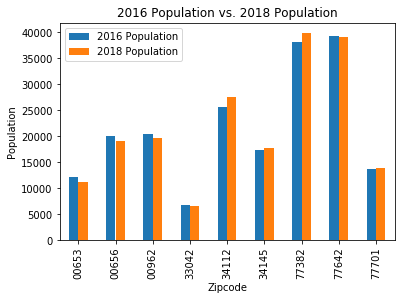

In [48]:
merge_table_df.plot(x="Zipcode", y=["2016 Population", "2018 Population"], kind="bar")
plt.title("2016 Population vs. 2018 Population")
plt.ylabel("Population")

Text(0, 0.5, 'Median Home Value')

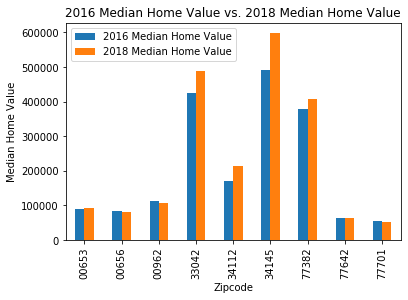

In [49]:
merge_table_df.plot(x="Zipcode", y=["2016 Median Home Value", "2018 Median Home Value"], kind="bar")
plt.title("2016 Median Home Value vs. 2018 Median Home Value")
plt.ylabel("Median Home Value")

Text(0, 0.5, 'Poverty Count')

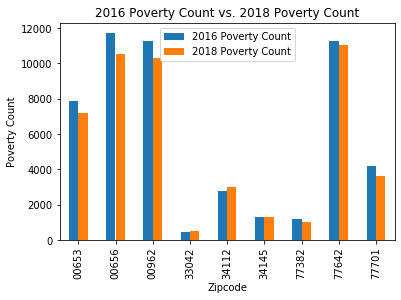

In [50]:
merge_table_df.plot(x="Zipcode", y=["2016 Poverty Count", "2018 Poverty Count"], kind="bar")
plt.title("2016 Poverty Count vs. 2018 Poverty Count")
plt.ylabel("Poverty Count")